# Lab 3: Bayesian Models

Machine Learning for Neuroscience, <br>Department of Brain Sciences, Faculty of Medicine, <br> Imperial College London

**Contributors:** Francesca Palermo, Nan Fletcher-Lloyd, Alex Capstick, Iona Biggart, Antigone Fogel, Anastasia Gailly-de-Taurines, Yu Chen, Tianyu Cui, Marirena Bafaloukou, Ruxandra Mihai, Payam Barnaghi
**Spring 2025**

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Let's start by creating a normal distribution with mean=0 and variance=1.

**Note:** `np.linspace()` is a function in NumPy that generates evenly spaced numbers over a specified range. It uses parameters in this order `np.linspace(start, stop, num)` where:
- `start` and `stop` are the starting and ending values for the sequence
- `num` is the number of evenly spaced samples to generate *including* start and stop

In [7]:
mu = 0 # mean
var = 1 # variance
stdev = math.sqrt(var)

# Define a range for x
x = np.linspace(mu - 3*stdev, mu + 3*stdev, 100)

### Probability Density Function

Now, let's create a probability density function for `x`

1. `stats.norm.pdf(x,mu,stdev)` creates a probability density function with x=x, mean=mu, and stdev=stdev
2. `plt.plot()` plots a line plot of our pdf. Arguments in the below example are:
    - `x` specifies the x-axis values 
    - `pdf` specifies the y-values 

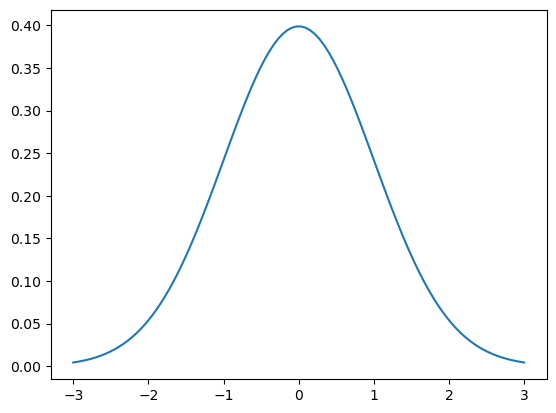

In [8]:
# Create a probability density function
pdf = stats.norm.pdf(x, mu, stdev)

# Plot probability density function for x
plt.plot(x, pdf)
plt.show()

### Cumulative Distribution Function

Now let's create and plot a cumulative distribution functioin for x

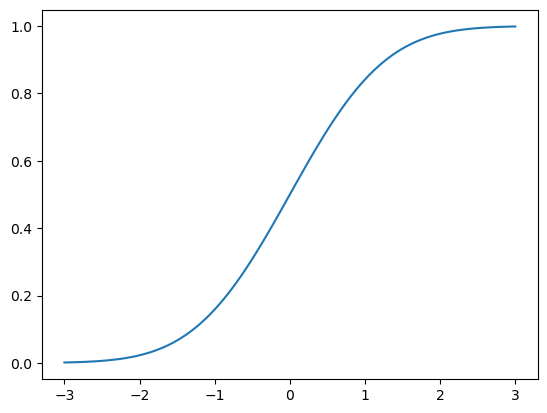

In [9]:
cdf = stats.norm.cdf(x)

# Plot CDF for x
plt.plot(x, cdf)

### Multivariate Gaussian Distribution

Now, let's create and plot a multivariate gaussian distribution.

A **multivariate gaussian distribution** is the same thing as a 2D normal distribution

**Explaining the code below:** 
- `np.meshgrid()` creates a grid of coordinated matrices from coordinated vectors, in this case, `x` and `y`
- `pos=np.empty(X.shape+(2,))` creates an empty NumPy array with the same shape as X but an additional dimension of size 2
    - by adding `(2,)` you're extending the shape to accommodate two values for each grid point
- `pos[:, :, 0] = X; pos[:, :, 1] = Y` assign `X` and `Y` to the `pos` array
- `random_var = multivariate_normal([mu_x, mu_y], [[var_x, 0], [0, var_y]])`
    - `multivariate_normal` is being used to create a multivariate normal distribution with:
        - the **mean vector**: `[mu_x, mu_y]`
        - the **covariance matrix**: `[[var_x, 0], [0, var_y]]

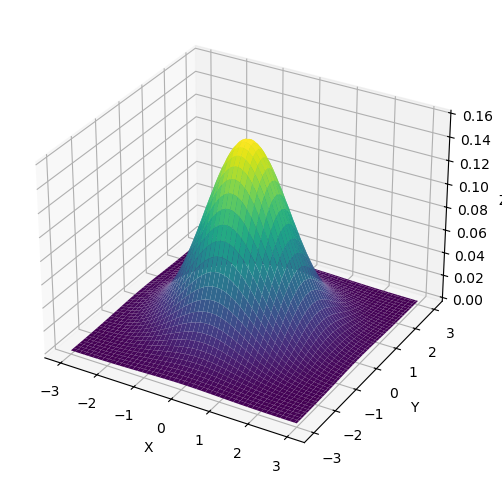

In [10]:
# Mean, variance, and stdev for x
mu_x = 0
var_x = 1
stdev_x = math.sqrt(var_x)

# Mean, variance, and stdev for y
mu_y = 0
var_y = 1
stdev_y = math.sqrt(var_y)

# Create a grid for the multivariate gaussian distribution
x = np.linspace(mu_x - 3*stdev_x, mu_x + 3*stdev_x, 100)
y =np.linspace(mu_y - 3*stdev_y, mu_y + 3*stdev_y, 100)
X, Y = np.meshgrid(x,y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
random_var = multivariate_normal([mu_x, mu_y], [[var_x, 0], [0, var_y]])

#Show a 3D plot for the multivariate gaussian distribution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, random_var.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

`make_pipeline()` is a function in **scikit-learn** used to create a pipeline that sequentially applies a series of data transformations and a model. It simplifies the process of chaining preprocessing steps and machine learning algorithms together in the correct order.

In [13]:
## Fetch dataset 1464 from OpenML ##
X, y = fetch_openml(data_id=1464, return_X_y=True, parser='auto')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## Define your pipeline ##
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

Now plot a confusion matrix to investigate model performance

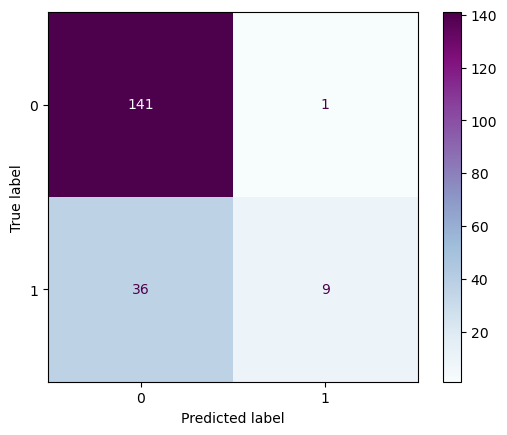

In [14]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot(cmap='BuPu')